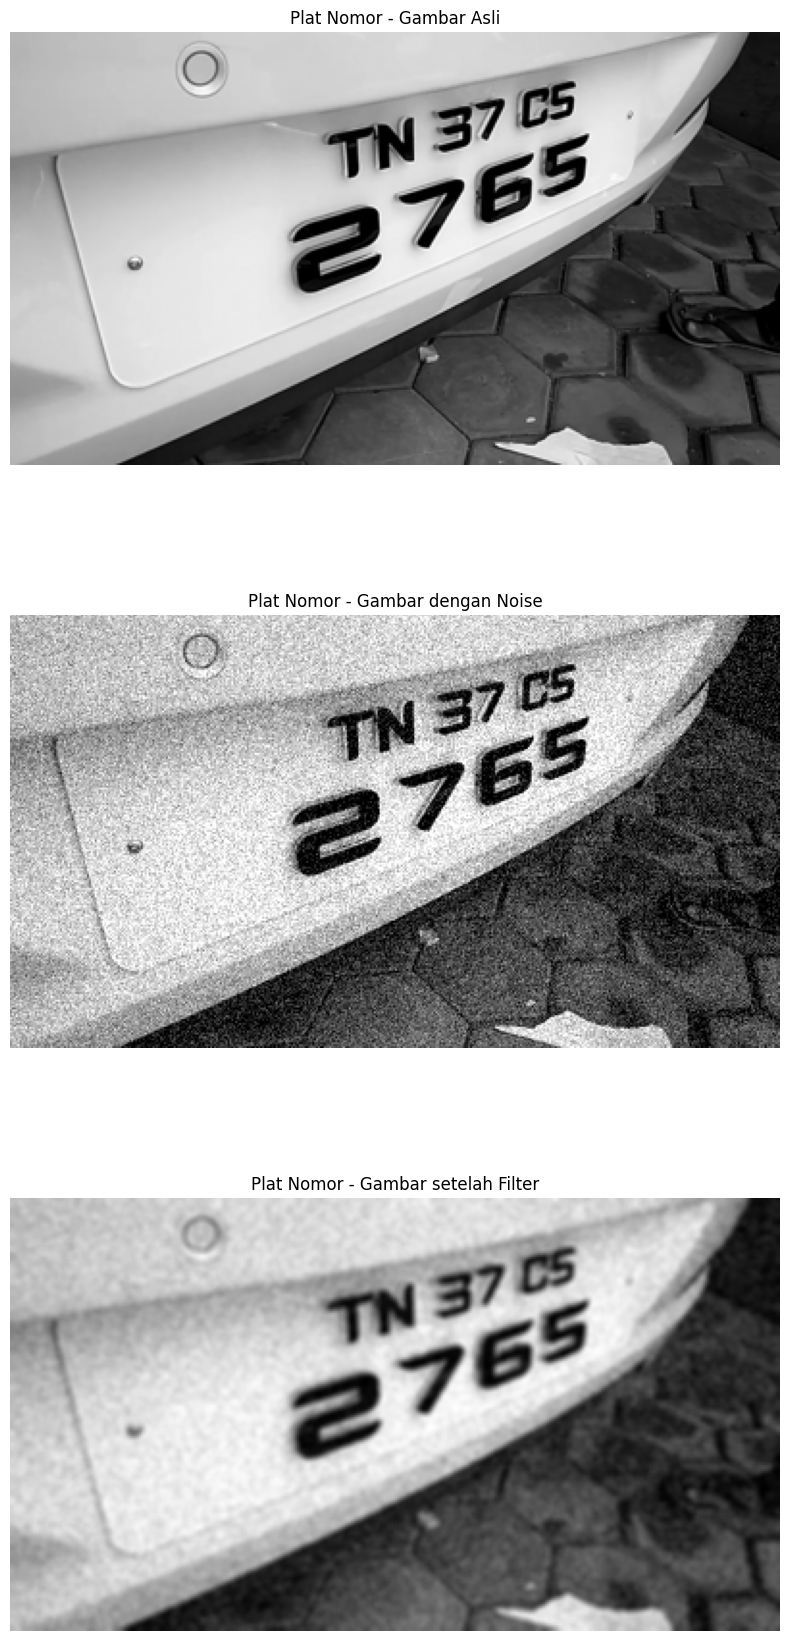

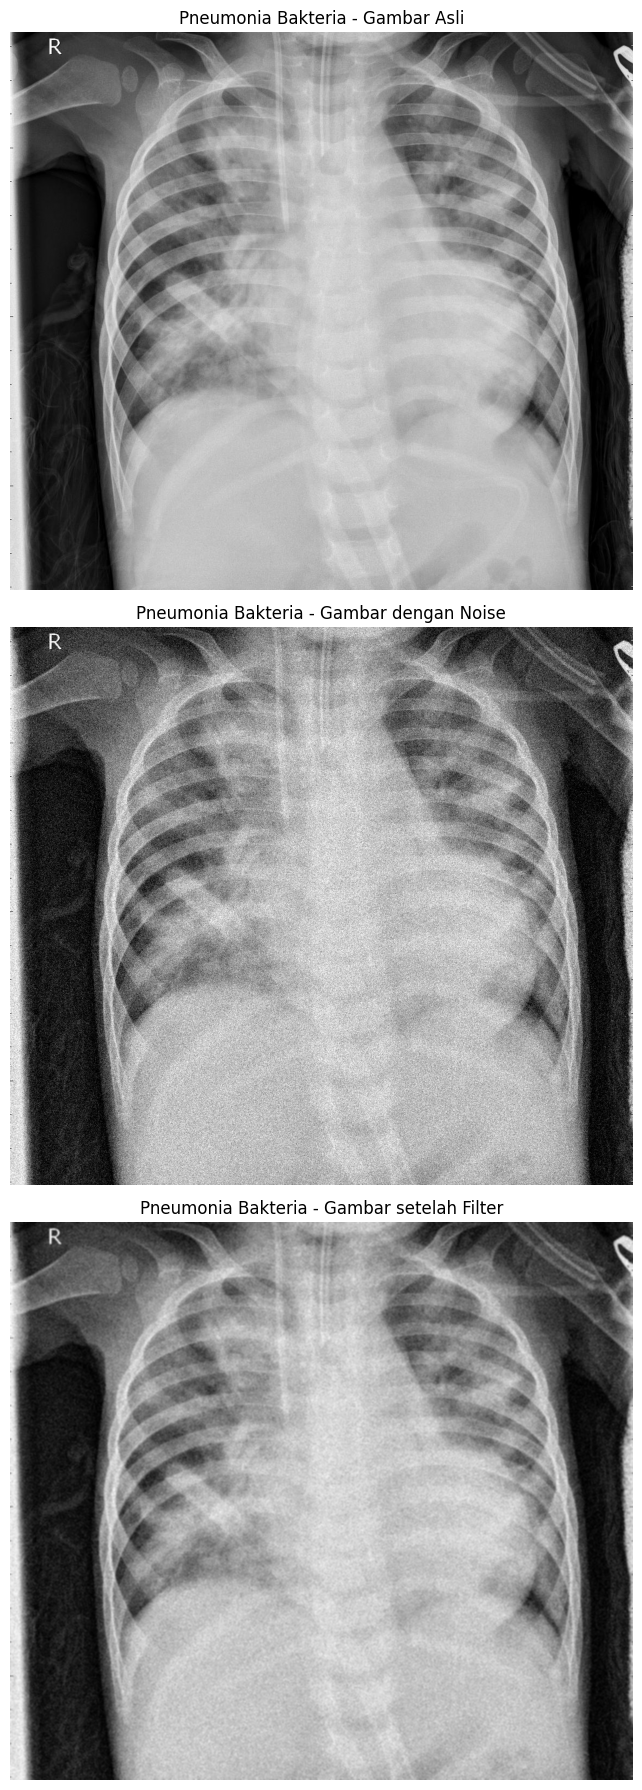

Hasil Perhitungan MSE dan PSNR:
Plat Nomor -> MSE: 44.6060, PSNR: 31.64 dB
Pneumonia Bakteria -> MSE: 36.5250, PSNR: 32.50 dB


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


filepath = {
    "Plat Nomor": "/content/Data-License-Plate.png",
    "Pneumonia Bakteria": "/content/Data-PNEUMONIA-BACTERIA.jpeg"
}

def tambahkan_noise_gaussian(gambar, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, gambar.shape).astype(np.int16)
    gambar_noise = np.clip(gambar.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    return gambar_noise


def hitung_mse_psnr(asli, hasil):
    mse = np.mean((asli - hasil) ** 2)
    psnr = 10 * np.log10((255 ** 2) / mse) if mse != 0 else float("inf")
    return mse, psnr


hasil_perhitungan = {}


for judul, path in filepath.items():
    gambar_asli = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(8, 18))
    plt.subplot(3, 1, 1)
    plt.imshow(gambar_asli, cmap="gray")
    plt.title(f"{judul} - Gambar Asli", fontsize=12)
    plt.axis("off")


    gambar_noise = tambahkan_noise_gaussian(gambar_asli)

    plt.subplot(3, 1, 2)
    plt.imshow(gambar_noise, cmap="gray")
    plt.title(f"{judul} - Gambar dengan Noise", fontsize=12)
    plt.axis("off")

    gambar_filter = cv2.GaussianBlur(gambar_noise, (5, 5), 1.5)

    plt.subplot(3, 1, 3)
    plt.imshow(gambar_filter, cmap="gray")
    plt.title(f"{judul} - Gambar setelah Filter", fontsize=12)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    mse, psnr = hitung_mse_psnr(gambar_asli, gambar_filter)
    hasil_perhitungan[judul] = {"MSE": mse, "PSNR": psnr}

print("Hasil Perhitungan MSE dan PSNR:")
for judul, metrik in hasil_perhitungan.items():
    print(f"{judul} -> MSE: {metrik['MSE']:.4f}, PSNR: {metrik['PSNR']:.2f} dB")


### Keterangan:  

- semakin kecil nilai MSE, maka akan semakin mirip gambar hasil filter dengan gambar yang asli
- semakin tinggi nilai PSNR, maka akan semakin baik kualitas gambar setelah diproses

### Interpretasi Hasil :

- **gambar plat nomor (MSE = 44.6060 , PNSR = 31.64 dB)**

    menunjukkan bahwa terdapat perbedaan antara gambar asli dengan gambar hasil filter

    nilai PNSR 31.64 menunjukkan bahwa gambar hasil filtering cukup mendekati gambar asli dan noise pada gambar mulai berkurang

- **gambar pneumonia bakteria (MSE = 36.5250 , PSNR = 32.50 dB)**

    menunjukkan bahwa nilai MSE pada gambar tersebut lebih rendah dibandingkan dengan gambar plat nomor, sehingga gambar hasil filter lebih mendekati gambar yang asli

    nilai PNSR lebih besar dibandingkan dengan gambar plat nomor, berarti kualitas hasil filter pada gambar pneumonia akan lebih baik.